In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
from tqdm import tqdm
import requests
from urllib.parse import urlparse
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import datetime
from sklearn.preprocessing import quantile_transform
pd.options.mode.chained_assignment = None  # default='warn'
import gc
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
font_path = './NanumFontSetup_TTF_BARUNGOTHIC/NanumBarunGothic.ttf'
import matplotlib.font_manager as fm
fontprop = fm.FontProperties(fname=font_path, size=18)

In [2]:
%%time
# Read Data
basedir = './Training/training_data_ver_16/'
training_data_df = pd.read_csv(basedir + 'training_data_ver_16.csv').drop(columns=['주택가격지수']).dropna()
#training_data_df = training_data_df[(training_data_df['가격면적'] >= 200) & (training_data_df['가격면적'] <= 1500)]
training_data_df.columns = [col.replace(' ','_').replace('·','_') for col in training_data_df.columns]
print(training_data_df.shape)
training_data_df.head()

(3857227, 403)
Wall time: 58.7 s


,전용면적,금액(만원),층,건축년도,가격면적,target_log_transformed,targetarea_log_transformed,지번주소,전용면적_mean,전용면적_min,전용면적_max,건물나이,year_linear,month_sin,month_cos,xnorm,ynorm,x_2nd,y_2nd,x_sin,y_sin,x_cos,y_cos,xy,trade_type,공시지가(만원),표준지여부,철근콘크리트구조_fraction,철골철근콘크리트구조_fraction,벽돌구조_fraction,프리케스트콘크리트구조_fraction,경량철골구조_fraction,철골콘크리트구조_fraction,일반철골구조_fraction,블록구조_fraction,일반목구조_fraction,기타조적구조_fraction,기타강구조_fraction,강파이프구조_fraction,기타구조_fraction,석구조_fraction,기타콘크리트구조_fraction,라멘조_fraction,조립식판넬조_fraction,주_용도_공동주택_fraction,주_용도_종교시설_fraction,주_용도_제2종근린생활시설_fraction,주_용도_단독주택_fraction,주_용도_제1종근린생활시설_fraction,주_용도_교육연구시설_fraction,주_용도_판매시설_fraction,주_용도_노유자시설_fraction,주_용도_자동차관련시설_fraction,주_용도_업무시설_fraction,주_용도_운동시설_fraction,주_용도_창고시설_fraction,주_용도_문화및집회시설_fraction,주_용도_숙박시설_fraction,주_용도_근린생활시설_fraction,주_용도_위험물저장및처리시설_fraction,주_용도_동.식물관련시설_fraction,주_용도_의료시설_fraction,주_용도_공장_fraction,주_용도_관광휴게시설_fraction,주_용도_수련시설_fraction,주_용도_판매및영업시설_fraction,주_용도_교육연구및복지시설_fraction,지붕_평지붕_fraction,지붕_철콘지붕_fraction,지붕_경사지붕_fraction,지붕_기타지붕_fraction,지붕_기와지붕_fraction,지붕_판넬지붕_fraction,지붕_박공지붕_fraction,지붕_모임지붕_fraction,지붕_스페니쉬기와_fraction,지붕_슬레이트지붕_fraction,지붕_초가지붕_fraction,지붕_멘사드지붕_fraction,지붕_철골지붕_fraction,지붕_함석지붕_fraction,지붕_목구조지붕_fraction,지붕_원형지붕_fraction,지붕_금속지붕_fraction,지붕_전통지붕_fraction,지붕_비닐지붕_fraction,총외필지수,총건축면적,총연면적,총용적률연면적,총호수,주건축물수,부속건축물수,부속건축물면적,옥내기계식대수,옥외기계식대수,옥내자주식대수,옥외자주식대수,총주차수,epi점수,친환경점수,호수대비연면적,호수대비주차수,층min,층max,층mean,층median,층norm,지하세대있음,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,(한강)오염행위_제한지역,(한강)폐기물매립시설_설치제한지역,4대문안,가로구역별_최고높이_제한지역,가스공급설비,가축사육제한구역,개발제한구역,개발진흥지구,개발행위허가제한지역,건축선,건축용도지역기타,건축용도지역미분류,건축허가_착공제한지역,경관광장,경관녹지,경관지구,경관지구기타,고도지구,고등학교,고속철도,공공공지,공공도서관,공공문화체육시설미분류,공공시설구역,공공주택지구,공공지원민간임대주택_공급촉진지구,공공청사,공동구,공용시설보호지구,공원,공원마을지구(공원집단시설지구),공원자연보존지구,공원자연환경지구,공익용산지,공익임지,공장설립승인지역,공장설립제한지역,공항소음피해예상지역,공항시설보호지구,과밀억제권역,광로1류(폭_70M_이상),광로2류(폭_50M~70M),광로3류(폭_40M~50M),광역계획구역,광장,교육환경보호구역,교통광장,국가산업단지,국가지정문화재구역,국가하천,국립공원,국민임대주택단지예정지구,국지도로,국토이용기타용도지구,국토이용용도지구기타,근린공원,근린광장,근린상업지역,기타공공공지시설,기타공공청사시설,기타공원시설,기타교통시설,기타녹지시설,기타도로시설,기타도시공간시설,기타문화시설,기타보건위생시설,기타수도시설,기타시장시설,기타용도지역지구기타,기타용지,기타유통및공급시설,기타유통업무설비,기타자동차정류장,기타주차장시설,기타철도시설,기타폐기물처리시설,노외주차장,녹지,대공방어협조구역,대공방어협조구역(위탁고도54-236m),대공방어협조구역(위탁고도77-257m),대로1류(폭_35M~40M),대로2류(폭_30M~35M),대로3류(폭_25M~30M),대학,도로,도로구역,도서관,도시개발구역,도시개발구역기타,도시고속도로,도시관리계획_입안중,도시기타용도지역지구기타,도시기타용도지역지구미분류,도시기타용도지역지구용도지역지구,도시자연공원,도시자연공원구역,도시지역,도시지역기타,도시철도,묘지공원,문화공원,문화시설,문화재,문화재보존영향_검토대상구역,문화재보호구역,문화재보호구역기타,문화지구,박물관,방송통신시설,방수설비,방재지구,방화지구,변전소(전원개발사업구역),변전시설,보전산지,보전임지,보존지구,보행자전용도로,부설주차장,비오톱1등급,비행안전제2구역(전술),비행안전제2구역(지원),비행안전제3구역(전술),비행안전제3구역(지원),비행안전제4구역(지원),비행안전제5구역(전술),비행안전제5구역(지원),비행안전제6구역(전술),사고지,사방시설,사방지,사업지역기타,사업지역미분류,사회복지시설,산업개발진흥지구,산업시설구역,상대보호구역,상대정화구역,상수원보호구역,상수원보호기타,생산녹지지역,소공원,소로1류(폭_10M~12M),소로2류(폭_8M~10M),소로3류(폭_8M_미만),소하천,소하천구역,수도공급시설,수평표면구역,시_도_생태_경관보전지역,시가지경관지구,시가지조성사업지역,시도지정문화재구역,시장,시장정비구역,시장정비구역기타,아파트지구,야생생물보호구역,어린이공원,여객자동차터미널,역사도심,역사문화미관지구,역사문화특화경관지구,역사문화환경보존지역,연결녹지,연구개발특구,연구시설,열공급설비,온천공보호구역,완충녹지,용도구역기타,용도구역미분류,운동장,원추표면구역,원형보존지,유수지,유원지,유치원,유통단지,유통상업지역,유통업무설비,일단의공업용지조성사업지역,일단의주택단지조성사업지역,일반도로,일반미관지구,일반산업단지,일반상업지역,일반주거지역,일반철도,임업용산지,자동차검사시설,자동차전용도로,자동차정류장,자연경관지구,자연녹지지역,자연재해위험지구,장애물제한표면구역,재개발구역,재개발구역기타,재정비촉진지구,재정비촉진지구기타,저류시설,전기공급설비,전용주거지역,전이표면구역,전통사찰보존구역,절대보호구역,절대정화구역,정비구역,정비구역기타,정비예정구역,제1종일반주거지역,제1종전용주거지역,제1종지구단위계획구역,제2종일반주거지역,제2종전용주거지역,제3종_구역,제3종일반주거지역,제방,제한보호구역,제한보호구역(전술항공5km),제한보호구역(후방지역500m),조례로정한지역,조망가로미관지구,조망가로특화경관지구,종합의료시설,주간선도로,주거용지,주거환경개선지구,주차장,주차장기타,주차환경개선지구,준공업지역,준보전산지,준주거지역,중로1류(폭_20M~25M),중로2류(폭_15M~20M),중로3류(폭_12M~15M),중심대광장,중심상업지역,중심지미관지구,중요시설물보존지구,중요시설물보호지구,중요시설물보호지구(공용),중요시설물보호지구(공항),중점경관관리구역,중학교,지구단위계획구역,지역특화발전특구,지원시설구역,지정문화재구역,지하광장,지하도로,진입표면구역,집단취락지구,철도,청사,청소년수련시설,체육공원,체육시설,초등학교,최고고도지구,침수위험지구,택지개발예정지구,택지개발예정지구기타,토지거래계약에관한허가구역,토지구획정리사업지구기타,통제보호구역,통제보호구역(민통선이남300m),특수도로(보행자전용도로),특정개발진흥지구,특화경관지구,폐기물처리및재활용시설,폐기물처리시설,하수도,하수종말처리시설,하천,하천구역,학교,학교시설보호지구,학교이적지,학교환경위생_정화구역,현상변경허가_대상구역,홍수관리구역
0,77.75,57000.0,2,1988,733.118971,10.950807,6.597308,서울특별시 강남구 개포동 655-2,77.75,77.75,77.75,0,7.666667,-0.866025,-0.500000,5579.095707,-9048.95

<AxesSubplot:>

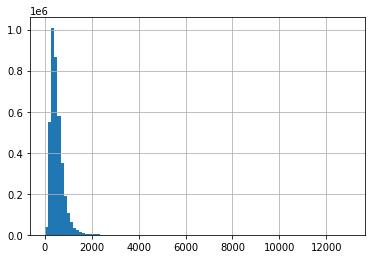

In [3]:
training_data_df['가격면적'].hist(bins=100)

In [4]:
training_data_df['가격면적'].describe()

count    3.857227e+06
mean     5.085237e+02
std      2.754056e+02
min      1.402464e+01
25%      3.243679e+02
50%      4.486317e+02
75%      6.229605e+02
max      1.300000e+04
Name: 가격면적, dtype: float64

In [5]:
training_data_df = training_data_df[(training_data_df['가격면적'] >= 200) & (training_data_df['가격면적'] <= 3000)]
print(training_data_df.shape)
training_data_df.head()

(3672159, 403)


,전용면적,금액(만원),층,건축년도,가격면적,target_log_transformed,targetarea_log_transformed,지번주소,전용면적_mean,전용면적_min,전용면적_max,건물나이,year_linear,month_sin,month_cos,xnorm,ynorm,x_2nd,y_2nd,x_sin,y_sin,x_cos,y_cos,xy,trade_type,공시지가(만원),표준지여부,철근콘크리트구조_fraction,철골철근콘크리트구조_fraction,벽돌구조_fraction,프리케스트콘크리트구조_fraction,경량철골구조_fraction,철골콘크리트구조_fraction,일반철골구조_fraction,블록구조_fraction,일반목구조_fraction,기타조적구조_fraction,기타강구조_fraction,강파이프구조_fraction,기타구조_fraction,석구조_fraction,기타콘크리트구조_fraction,라멘조_fraction,조립식판넬조_fraction,주_용도_공동주택_fraction,주_용도_종교시설_fraction,주_용도_제2종근린생활시설_fraction,주_용도_단독주택_fraction,주_용도_제1종근린생활시설_fraction,주_용도_교육연구시설_fraction,주_용도_판매시설_fraction,주_용도_노유자시설_fraction,주_용도_자동차관련시설_fraction,주_용도_업무시설_fraction,주_용도_운동시설_fraction,주_용도_창고시설_fraction,주_용도_문화및집회시설_fraction,주_용도_숙박시설_fraction,주_용도_근린생활시설_fraction,주_용도_위험물저장및처리시설_fraction,주_용도_동.식물관련시설_fraction,주_용도_의료시설_fraction,주_용도_공장_fraction,주_용도_관광휴게시설_fraction,주_용도_수련시설_fraction,주_용도_판매및영업시설_fraction,주_용도_교육연구및복지시설_fraction,지붕_평지붕_fraction,지붕_철콘지붕_fraction,지붕_경사지붕_fraction,지붕_기타지붕_fraction,지붕_기와지붕_fraction,지붕_판넬지붕_fraction,지붕_박공지붕_fraction,지붕_모임지붕_fraction,지붕_스페니쉬기와_fraction,지붕_슬레이트지붕_fraction,지붕_초가지붕_fraction,지붕_멘사드지붕_fraction,지붕_철골지붕_fraction,지붕_함석지붕_fraction,지붕_목구조지붕_fraction,지붕_원형지붕_fraction,지붕_금속지붕_fraction,지붕_전통지붕_fraction,지붕_비닐지붕_fraction,총외필지수,총건축면적,총연면적,총용적률연면적,총호수,주건축물수,부속건축물수,부속건축물면적,옥내기계식대수,옥외기계식대수,옥내자주식대수,옥외자주식대수,총주차수,epi점수,친환경점수,호수대비연면적,호수대비주차수,층min,층max,층mean,층median,층norm,지하세대있음,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,(한강)오염행위_제한지역,(한강)폐기물매립시설_설치제한지역,4대문안,가로구역별_최고높이_제한지역,가스공급설비,가축사육제한구역,개발제한구역,개발진흥지구,개발행위허가제한지역,건축선,건축용도지역기타,건축용도지역미분류,건축허가_착공제한지역,경관광장,경관녹지,경관지구,경관지구기타,고도지구,고등학교,고속철도,공공공지,공공도서관,공공문화체육시설미분류,공공시설구역,공공주택지구,공공지원민간임대주택_공급촉진지구,공공청사,공동구,공용시설보호지구,공원,공원마을지구(공원집단시설지구),공원자연보존지구,공원자연환경지구,공익용산지,공익임지,공장설립승인지역,공장설립제한지역,공항소음피해예상지역,공항시설보호지구,과밀억제권역,광로1류(폭_70M_이상),광로2류(폭_50M~70M),광로3류(폭_40M~50M),광역계획구역,광장,교육환경보호구역,교통광장,국가산업단지,국가지정문화재구역,국가하천,국립공원,국민임대주택단지예정지구,국지도로,국토이용기타용도지구,국토이용용도지구기타,근린공원,근린광장,근린상업지역,기타공공공지시설,기타공공청사시설,기타공원시설,기타교통시설,기타녹지시설,기타도로시설,기타도시공간시설,기타문화시설,기타보건위생시설,기타수도시설,기타시장시설,기타용도지역지구기타,기타용지,기타유통및공급시설,기타유통업무설비,기타자동차정류장,기타주차장시설,기타철도시설,기타폐기물처리시설,노외주차장,녹지,대공방어협조구역,대공방어협조구역(위탁고도54-236m),대공방어협조구역(위탁고도77-257m),대로1류(폭_35M~40M),대로2류(폭_30M~35M),대로3류(폭_25M~30M),대학,도로,도로구역,도서관,도시개발구역,도시개발구역기타,도시고속도로,도시관리계획_입안중,도시기타용도지역지구기타,도시기타용도지역지구미분류,도시기타용도지역지구용도지역지구,도시자연공원,도시자연공원구역,도시지역,도시지역기타,도시철도,묘지공원,문화공원,문화시설,문화재,문화재보존영향_검토대상구역,문화재보호구역,문화재보호구역기타,문화지구,박물관,방송통신시설,방수설비,방재지구,방화지구,변전소(전원개발사업구역),변전시설,보전산지,보전임지,보존지구,보행자전용도로,부설주차장,비오톱1등급,비행안전제2구역(전술),비행안전제2구역(지원),비행안전제3구역(전술),비행안전제3구역(지원),비행안전제4구역(지원),비행안전제5구역(전술),비행안전제5구역(지원),비행안전제6구역(전술),사고지,사방시설,사방지,사업지역기타,사업지역미분류,사회복지시설,산업개발진흥지구,산업시설구역,상대보호구역,상대정화구역,상수원보호구역,상수원보호기타,생산녹지지역,소공원,소로1류(폭_10M~12M),소로2류(폭_8M~10M),소로3류(폭_8M_미만),소하천,소하천구역,수도공급시설,수평표면구역,시_도_생태_경관보전지역,시가지경관지구,시가지조성사업지역,시도지정문화재구역,시장,시장정비구역,시장정비구역기타,아파트지구,야생생물보호구역,어린이공원,여객자동차터미널,역사도심,역사문화미관지구,역사문화특화경관지구,역사문화환경보존지역,연결녹지,연구개발특구,연구시설,열공급설비,온천공보호구역,완충녹지,용도구역기타,용도구역미분류,운동장,원추표면구역,원형보존지,유수지,유원지,유치원,유통단지,유통상업지역,유통업무설비,일단의공업용지조성사업지역,일단의주택단지조성사업지역,일반도로,일반미관지구,일반산업단지,일반상업지역,일반주거지역,일반철도,임업용산지,자동차검사시설,자동차전용도로,자동차정류장,자연경관지구,자연녹지지역,자연재해위험지구,장애물제한표면구역,재개발구역,재개발구역기타,재정비촉진지구,재정비촉진지구기타,저류시설,전기공급설비,전용주거지역,전이표면구역,전통사찰보존구역,절대보호구역,절대정화구역,정비구역,정비구역기타,정비예정구역,제1종일반주거지역,제1종전용주거지역,제1종지구단위계획구역,제2종일반주거지역,제2종전용주거지역,제3종_구역,제3종일반주거지역,제방,제한보호구역,제한보호구역(전술항공5km),제한보호구역(후방지역500m),조례로정한지역,조망가로미관지구,조망가로특화경관지구,종합의료시설,주간선도로,주거용지,주거환경개선지구,주차장,주차장기타,주차환경개선지구,준공업지역,준보전산지,준주거지역,중로1류(폭_20M~25M),중로2류(폭_15M~20M),중로3류(폭_12M~15M),중심대광장,중심상업지역,중심지미관지구,중요시설물보존지구,중요시설물보호지구,중요시설물보호지구(공용),중요시설물보호지구(공항),중점경관관리구역,중학교,지구단위계획구역,지역특화발전특구,지원시설구역,지정문화재구역,지하광장,지하도로,진입표면구역,집단취락지구,철도,청사,청소년수련시설,체육공원,체육시설,초등학교,최고고도지구,침수위험지구,택지개발예정지구,택지개발예정지구기타,토지거래계약에관한허가구역,토지구획정리사업지구기타,통제보호구역,통제보호구역(민통선이남300m),특수도로(보행자전용도로),특정개발진흥지구,특화경관지구,폐기물처리및재활용시설,폐기물처리시설,하수도,하수종말처리시설,하천,하천구역,학교,학교시설보호지구,학교이적지,학교환경위생_정화구역,현상변경허가_대상구역,홍수관리구역
0,77.75,57000.0,2,1988,733.118971,10.950807,6.597308,서울특별시 강남구 개포동 655-2,77.75,77.75,77.75,0,7.666667,-0.866025,-0.500000,5579.095707,-9048.95

<AxesSubplot:>

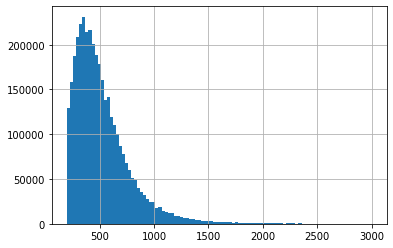

In [6]:
training_data_df['가격면적'].hist(bins=100)

In [7]:
training_data_df['호수대비부속건축물면적'] = training_data_df['부속건축물면적'] / training_data_df['총호수']

In [8]:
training_data_df['호수대비부속건축물면적'].describe()

count    3.672159e+06
mean     4.874879e+01
std      1.322271e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.191623e+01
max      5.266776e+04
Name: 호수대비부속건축물면적, dtype: float64

<AxesSubplot:>

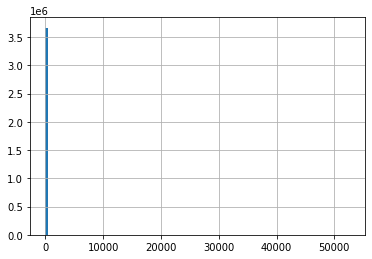

In [9]:
training_data_df['호수대비부속건축물면적'].hist(bins=100)

In [10]:
training_data_df = training_data_df[(training_data_df['호수대비부속건축물면적'] < 100)]

In [11]:
training_data_df.shape

(3658226, 404)

In [12]:
training_data_df = training_data_df.reset_index(drop=True)

In [13]:
cols_to_log = ['총건축면적', '총연면적', '총용적률연면적', '토지면적', '부속건축물면적']
for col in cols_to_log:
    training_data_df[col] = training_data_df[col].apply(np.log1p)

In [14]:
cat_cols_df = pd.read_csv(basedir + 'cat_cols.csv')
cat_cols_df.head()

,colname
0,trade_type
1,표준지여부
2,건물나이
3,지목명
4,용도지역명1


In [15]:
cat_cols_list = [col.replace(' ','_').replace('·','_') for col in cat_cols_df['colname'].tolist()]
len(cat_cols_list)

296

In [16]:
cat_cols = [col for col in training_data_df.columns if col in cat_cols_list]
len(cat_cols)

296

In [17]:
cat_cols[:10]

['건물나이',
 'trade_type',
 '표준지여부',
 '지목명',
 '용도지역명1',
 '용도지역명2',
 '토지이동상황',
 '지형높이',
 '지형형상',
 '도로접면']

In [18]:
test_data = training_data_df.sample(frac=0.2)
train_data = training_data_df.drop(test_data.index)
valid_data = train_data.sample(frac=0.2)
train_data = train_data.drop(valid_data.index)
print(test_data.shape)
print(valid_data.shape)
print(train_data.shape)

(731645, 404)
(585316, 404)
(2341265, 404)


In [19]:
target_cols = ['금액(만원)', '가격면적', 'target_log_transformed', 'targetarea_log_transformed', '지번주소']#, 'land_area_log']

In [20]:
x_test = test_data.drop(columns=target_cols)
y_test = test_data['가격면적']
print(x_test.shape)
print(y_test.shape)

(731645, 399)
(731645,)


In [21]:
x_valid = valid_data.drop(columns=target_cols)
y_valid = valid_data['가격면적']
print(x_valid.shape)
print(y_valid.shape)

(585316, 399)
(585316,)


In [22]:
x_train = train_data.drop(columns=target_cols)
y_train = train_data['가격면적']
print(x_train.shape)
print(y_train.shape)

(2341265, 399)
(2341265,)


<AxesSubplot:>

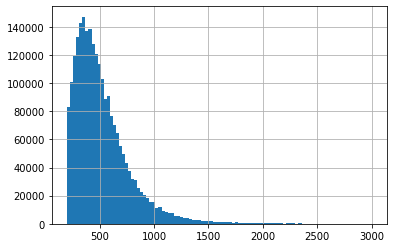

In [23]:
y_train.hist(bins=100)

# Training

In [24]:
from sklearn.metrics import r2_score

# ML Models

# Light GBM

In [25]:
import lightgbm as lgb

In [26]:
params = {
    'objective':'regression',
    'learning_rate': 0.03,
    'seed': 42,
    'max_depth': -1,
    'num_leaves':31,
    'lambda_l2':0,
    'metric':'huber'
}

In [27]:
train_dataset = lgb.Dataset(x_train, label=y_train, categorical_feature=cat_cols)
valid_dataset = lgb.Dataset(x_valid, label=y_valid, categorical_feature=cat_cols)

In [28]:
num_rounds = 5000

bst = lgb.train(params, train_dataset, num_rounds, valid_sets=[valid_dataset], early_stopping_rounds=200, verbose_eval=50)

c:\users\max6296\ml\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.561821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10188
[LightGBM] [Info] Number of data points in the train set: 2341265, number of used features: 380


c:\users\max6296\ml\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
c:\users\max6296\ml\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 524.550549
Training until validation scores don't improve for 200 rounds
[50]	valid_0's huber: 91.8463
[100]	valid_0's huber: 72.9906
[150]	valid_0's huber: 64.9651
[200]	valid_0's huber: 61.0501
[250]	valid_0's huber: 58.7105
[300]	valid_0's huber: 57.0408
[350]	valid_0's huber: 55.7045
[400]	valid_0's huber: 54.6444
[450]	valid_0's huber: 53.7395
[500]	valid_0's huber: 52.9685
[550]	valid_0's huber: 52.3136
[600]	valid_0's huber: 51.6968
[650]	valid_0's huber: 51.1792
[700]	valid_0's huber: 50.7199
[750]	valid_0's huber: 50.2621
[800]	valid_0's huber: 49.8363
[850]	valid_0's huber: 49.4499
[900]	valid_0's huber: 49.0817
[950]	valid_0's huber: 48.7113
[1000]	valid_0's huber: 48.3808
[1050]	valid_0's huber: 48.0754
[1100]	valid_0's huber: 47.7921
[1150]	valid_0's huber: 47.5174
[1200]	valid_0's huber: 47.252
[1250]	valid_0's huber: 47.0042
[1300]	valid_0's huber: 46.7735
[1350]	valid_0's huber: 46.5549
[1400]	valid_0's huber: 46.3379
[1450]	v

[12700]	valid_0's huber: 36.0343
[12750]	valid_0's huber: 36.0195
[12800]	valid_0's huber: 36.0063
[12850]	valid_0's huber: 35.9916
[12900]	valid_0's huber: 35.9772
[12950]	valid_0's huber: 35.9628
[13000]	valid_0's huber: 35.949
[13050]	valid_0's huber: 35.9365
[13100]	valid_0's huber: 35.9236
[13150]	valid_0's huber: 35.9116
[13200]	valid_0's huber: 35.9002
[13250]	valid_0's huber: 35.8875
[13300]	valid_0's huber: 35.8734
[13350]	valid_0's huber: 35.8594
[13400]	valid_0's huber: 35.8467
[13450]	valid_0's huber: 35.8348
[13500]	valid_0's huber: 35.8201
[13550]	valid_0's huber: 35.8072
[13600]	valid_0's huber: 35.7916
[13650]	valid_0's huber: 35.7771
[13700]	valid_0's huber: 35.764
[13750]	valid_0's huber: 35.7488
[13800]	valid_0's huber: 35.7337
[13850]	valid_0's huber: 35.7198
[13900]	valid_0's huber: 35.7048
[13950]	valid_0's huber: 35.6926
[14000]	valid_0's huber: 35.6801
[14050]	valid_0's huber: 35.6657
[14100]	valid_0's huber: 35.6545
[14150]	valid_0's huber: 35.6415
[14200]	vali

[25200]	valid_0's huber: 33.805
[25250]	valid_0's huber: 33.7988
[25300]	valid_0's huber: 33.7922
[25350]	valid_0's huber: 33.7865
[25400]	valid_0's huber: 33.7811
[25450]	valid_0's huber: 33.7745
[25500]	valid_0's huber: 33.7683
[25550]	valid_0's huber: 33.764
[25600]	valid_0's huber: 33.7581
[25650]	valid_0's huber: 33.7523
[25700]	valid_0's huber: 33.7467
[25750]	valid_0's huber: 33.7413
[25800]	valid_0's huber: 33.7362
[25850]	valid_0's huber: 33.7303
[25900]	valid_0's huber: 33.725
[25950]	valid_0's huber: 33.7187
[26000]	valid_0's huber: 33.7116
[26050]	valid_0's huber: 33.7054
[26100]	valid_0's huber: 33.7003
[26150]	valid_0's huber: 33.6948
[26200]	valid_0's huber: 33.6895
[26250]	valid_0's huber: 33.6836
[26300]	valid_0's huber: 33.6792
[26350]	valid_0's huber: 33.673
[26400]	valid_0's huber: 33.6684
[26450]	valid_0's huber: 33.6635
[26500]	valid_0's huber: 33.6584
[26550]	valid_0's huber: 33.6528
[26600]	valid_0's huber: 33.6476
[26650]	valid_0's huber: 33.6425
[26700]	valid_

[37700]	valid_0's huber: 32.7495
[37750]	valid_0's huber: 32.7465
[37800]	valid_0's huber: 32.743
[37850]	valid_0's huber: 32.74
[37900]	valid_0's huber: 32.7372
[37950]	valid_0's huber: 32.7346
[38000]	valid_0's huber: 32.7325
[38050]	valid_0's huber: 32.7293
[38100]	valid_0's huber: 32.7259
[38150]	valid_0's huber: 32.7229
[38200]	valid_0's huber: 32.7203
[38250]	valid_0's huber: 32.7169
[38300]	valid_0's huber: 32.715
[38350]	valid_0's huber: 32.7126
[38400]	valid_0's huber: 32.7094
[38450]	valid_0's huber: 32.7066
[38500]	valid_0's huber: 32.703
[38550]	valid_0's huber: 32.6994
[38600]	valid_0's huber: 32.6961
[38650]	valid_0's huber: 32.6928
[38700]	valid_0's huber: 32.6898
[38750]	valid_0's huber: 32.6868
[38800]	valid_0's huber: 32.6831
[38850]	valid_0's huber: 32.6805
[38900]	valid_0's huber: 32.6778
[38950]	valid_0's huber: 32.6749
[39000]	valid_0's huber: 32.6713
[39050]	valid_0's huber: 32.6683
[39100]	valid_0's huber: 32.6659
[39150]	valid_0's huber: 32.6622
[39200]	valid_0

[50150]	valid_0's huber: 32.0935
[50200]	valid_0's huber: 32.0922
[50250]	valid_0's huber: 32.0904
[50300]	valid_0's huber: 32.0885
[50350]	valid_0's huber: 32.0867
[50400]	valid_0's huber: 32.0849
[50450]	valid_0's huber: 32.0833
[50500]	valid_0's huber: 32.0816
[50550]	valid_0's huber: 32.0792
[50600]	valid_0's huber: 32.0769
[50650]	valid_0's huber: 32.0749
[50700]	valid_0's huber: 32.073
[50750]	valid_0's huber: 32.0699
[50800]	valid_0's huber: 32.0683
[50850]	valid_0's huber: 32.0663
[50900]	valid_0's huber: 32.0642
[50950]	valid_0's huber: 32.062
[51000]	valid_0's huber: 32.0601
[51050]	valid_0's huber: 32.0573
[51100]	valid_0's huber: 32.0553
[51150]	valid_0's huber: 32.0536
[51200]	valid_0's huber: 32.0513
[51250]	valid_0's huber: 32.0491
[51300]	valid_0's huber: 32.0473
[51350]	valid_0's huber: 32.0446
[51400]	valid_0's huber: 32.0411
[51450]	valid_0's huber: 32.0381
[51500]	valid_0's huber: 32.0352
[51550]	valid_0's huber: 32.0325
[51600]	valid_0's huber: 32.0301
[51650]	vali

[62600]	valid_0's huber: 31.657
[62650]	valid_0's huber: 31.6559
[62700]	valid_0's huber: 31.6542
[62750]	valid_0's huber: 31.6525
[62800]	valid_0's huber: 31.6512
[62850]	valid_0's huber: 31.6502
[62900]	valid_0's huber: 31.6489
[62950]	valid_0's huber: 31.6476
[63000]	valid_0's huber: 31.6462
[63050]	valid_0's huber: 31.6452
[63100]	valid_0's huber: 31.6441
[63150]	valid_0's huber: 31.6431
[63200]	valid_0's huber: 31.6418
[63250]	valid_0's huber: 31.6403
[63300]	valid_0's huber: 31.6387
[63350]	valid_0's huber: 31.6371
[63400]	valid_0's huber: 31.6356
[63450]	valid_0's huber: 31.6341
[63500]	valid_0's huber: 31.6334
[63550]	valid_0's huber: 31.6319
[63600]	valid_0's huber: 31.6305
[63650]	valid_0's huber: 31.6291
[63700]	valid_0's huber: 31.6276
[63750]	valid_0's huber: 31.6264
[63800]	valid_0's huber: 31.6253
[63850]	valid_0's huber: 31.6242
[63900]	valid_0's huber: 31.623
[63950]	valid_0's huber: 31.6219
[64000]	valid_0's huber: 31.6206
[64050]	valid_0's huber: 31.6192
[64100]	vali

[75100]	valid_0's huber: 31.3413
[75150]	valid_0's huber: 31.3404
[75200]	valid_0's huber: 31.3392
[75250]	valid_0's huber: 31.3382
[75300]	valid_0's huber: 31.337
[75350]	valid_0's huber: 31.3361
[75400]	valid_0's huber: 31.3348
[75450]	valid_0's huber: 31.3338
[75500]	valid_0's huber: 31.3323
[75550]	valid_0's huber: 31.3316
[75600]	valid_0's huber: 31.3303
[75650]	valid_0's huber: 31.3293
[75700]	valid_0's huber: 31.3281
[75750]	valid_0's huber: 31.3271
[75800]	valid_0's huber: 31.3262
[75850]	valid_0's huber: 31.3251
[75900]	valid_0's huber: 31.3239
[75950]	valid_0's huber: 31.3227
[76000]	valid_0's huber: 31.3215
[76050]	valid_0's huber: 31.3202
[76100]	valid_0's huber: 31.3189
[76150]	valid_0's huber: 31.3174
[76200]	valid_0's huber: 31.3166
[76250]	valid_0's huber: 31.3153
[76300]	valid_0's huber: 31.3142
[76350]	valid_0's huber: 31.3132
[76400]	valid_0's huber: 31.312
[76450]	valid_0's huber: 31.3107
[76500]	valid_0's huber: 31.3095
[76550]	valid_0's huber: 31.3085
[76600]	vali

[87600]	valid_0's huber: 31.1005
[87650]	valid_0's huber: 31.0996
[87700]	valid_0's huber: 31.0992
[87750]	valid_0's huber: 31.0988
[87800]	valid_0's huber: 31.0975
[87850]	valid_0's huber: 31.0964
[87900]	valid_0's huber: 31.0953
[87950]	valid_0's huber: 31.0939
[88000]	valid_0's huber: 31.0926
[88050]	valid_0's huber: 31.0913
[88100]	valid_0's huber: 31.0902
[88150]	valid_0's huber: 31.089
[88200]	valid_0's huber: 31.088
[88250]	valid_0's huber: 31.0872
[88300]	valid_0's huber: 31.0863
[88350]	valid_0's huber: 31.0856
[88400]	valid_0's huber: 31.0846
[88450]	valid_0's huber: 31.0836
[88500]	valid_0's huber: 31.0826
[88550]	valid_0's huber: 31.0818
[88600]	valid_0's huber: 31.0807
[88650]	valid_0's huber: 31.0795
[88700]	valid_0's huber: 31.0785
[88750]	valid_0's huber: 31.0773
[88800]	valid_0's huber: 31.0765
[88850]	valid_0's huber: 31.0754
[88900]	valid_0's huber: 31.0743
[88950]	valid_0's huber: 31.0735
[89000]	valid_0's huber: 31.0725
[89050]	valid_0's huber: 31.0721
[89100]	vali

[100100]	valid_0's huber: 30.9006
[100150]	valid_0's huber: 30.8999
[100200]	valid_0's huber: 30.8991
[100250]	valid_0's huber: 30.8986
[100300]	valid_0's huber: 30.8979
[100350]	valid_0's huber: 30.8972
[100400]	valid_0's huber: 30.8965
[100450]	valid_0's huber: 30.8958
[100500]	valid_0's huber: 30.8951
[100550]	valid_0's huber: 30.8947
[100600]	valid_0's huber: 30.894
[100650]	valid_0's huber: 30.8933
[100700]	valid_0's huber: 30.8929
[100750]	valid_0's huber: 30.8922
[100800]	valid_0's huber: 30.8915
[100850]	valid_0's huber: 30.8906
[100900]	valid_0's huber: 30.89
[100950]	valid_0's huber: 30.8893
[101000]	valid_0's huber: 30.8884
[101050]	valid_0's huber: 30.8877
[101100]	valid_0's huber: 30.887
[101150]	valid_0's huber: 30.8862
[101200]	valid_0's huber: 30.8855
[101250]	valid_0's huber: 30.8849
[101300]	valid_0's huber: 30.8839
[101350]	valid_0's huber: 30.8833
[101400]	valid_0's huber: 30.883
[101450]	valid_0's huber: 30.8824
[101500]	valid_0's huber: 30.8818
[101550]	valid_0's 

[112200]	valid_0's huber: 30.7526
[112250]	valid_0's huber: 30.7518
[112300]	valid_0's huber: 30.751
[112350]	valid_0's huber: 30.7502
[112400]	valid_0's huber: 30.7494
[112450]	valid_0's huber: 30.7488
[112500]	valid_0's huber: 30.7483
[112550]	valid_0's huber: 30.7478
[112600]	valid_0's huber: 30.747
[112650]	valid_0's huber: 30.7466
[112700]	valid_0's huber: 30.7458
[112750]	valid_0's huber: 30.7452
[112800]	valid_0's huber: 30.7446
[112850]	valid_0's huber: 30.7442
[112900]	valid_0's huber: 30.7434
[112950]	valid_0's huber: 30.7428
[113000]	valid_0's huber: 30.7423
[113050]	valid_0's huber: 30.7419
[113100]	valid_0's huber: 30.7414
[113150]	valid_0's huber: 30.7409
[113200]	valid_0's huber: 30.7405
[113250]	valid_0's huber: 30.74
[113300]	valid_0's huber: 30.7395
[113350]	valid_0's huber: 30.739
[113400]	valid_0's huber: 30.7384
[113450]	valid_0's huber: 30.738
[113500]	valid_0's huber: 30.7375
[113550]	valid_0's huber: 30.7371
[113600]	valid_0's huber: 30.7365
[113650]	valid_0's h

[124300]	valid_0's huber: 30.6357
[124350]	valid_0's huber: 30.6353
[124400]	valid_0's huber: 30.6349
[124450]	valid_0's huber: 30.6346
[124500]	valid_0's huber: 30.6345
[124550]	valid_0's huber: 30.6341
[124600]	valid_0's huber: 30.6336
[124650]	valid_0's huber: 30.6331
[124700]	valid_0's huber: 30.6324
[124750]	valid_0's huber: 30.6321
[124800]	valid_0's huber: 30.6317
[124850]	valid_0's huber: 30.6313
[124900]	valid_0's huber: 30.631
[124950]	valid_0's huber: 30.6307
[125000]	valid_0's huber: 30.6304
[125050]	valid_0's huber: 30.6298
[125100]	valid_0's huber: 30.6295
[125150]	valid_0's huber: 30.6291
[125200]	valid_0's huber: 30.6287
[125250]	valid_0's huber: 30.6284
[125300]	valid_0's huber: 30.6278
[125350]	valid_0's huber: 30.6272
[125400]	valid_0's huber: 30.6267
[125450]	valid_0's huber: 30.6265
[125500]	valid_0's huber: 30.6263
[125550]	valid_0's huber: 30.6259
[125600]	valid_0's huber: 30.6256
[125650]	valid_0's huber: 30.6252
[125700]	valid_0's huber: 30.6249
[125750]	valid_

[136400]	valid_0's huber: 30.5443
[136450]	valid_0's huber: 30.5437
[136500]	valid_0's huber: 30.5436
[136550]	valid_0's huber: 30.5432
[136600]	valid_0's huber: 30.5429
[136650]	valid_0's huber: 30.5426
[136700]	valid_0's huber: 30.5421
[136750]	valid_0's huber: 30.5418
[136800]	valid_0's huber: 30.5415
[136850]	valid_0's huber: 30.5411
[136900]	valid_0's huber: 30.5407
[136950]	valid_0's huber: 30.54
[137000]	valid_0's huber: 30.5396
[137050]	valid_0's huber: 30.5393
[137100]	valid_0's huber: 30.5388
[137150]	valid_0's huber: 30.5386
[137200]	valid_0's huber: 30.5384
[137250]	valid_0's huber: 30.5378
[137300]	valid_0's huber: 30.5375
[137350]	valid_0's huber: 30.5372
[137400]	valid_0's huber: 30.5369
[137450]	valid_0's huber: 30.5365
[137500]	valid_0's huber: 30.5361
[137550]	valid_0's huber: 30.5357
[137600]	valid_0's huber: 30.5354
[137650]	valid_0's huber: 30.5351
[137700]	valid_0's huber: 30.5348
[137750]	valid_0's huber: 30.5343
[137800]	valid_0's huber: 30.5339
[137850]	valid_0

[148500]	valid_0's huber: 30.4669
[148550]	valid_0's huber: 30.4664
[148600]	valid_0's huber: 30.4661
[148650]	valid_0's huber: 30.4657
[148700]	valid_0's huber: 30.4653
[148750]	valid_0's huber: 30.4649
[148800]	valid_0's huber: 30.4644
[148850]	valid_0's huber: 30.464
[148900]	valid_0's huber: 30.4638
[148950]	valid_0's huber: 30.4634
[149000]	valid_0's huber: 30.4632
[149050]	valid_0's huber: 30.463
[149100]	valid_0's huber: 30.4629
[149150]	valid_0's huber: 30.4625
[149200]	valid_0's huber: 30.4626
[149250]	valid_0's huber: 30.4623
[149300]	valid_0's huber: 30.4621
[149350]	valid_0's huber: 30.4617
[149400]	valid_0's huber: 30.4615
[149450]	valid_0's huber: 30.4611
[149500]	valid_0's huber: 30.4608
[149550]	valid_0's huber: 30.4605
[149600]	valid_0's huber: 30.4602
[149650]	valid_0's huber: 30.46
[149700]	valid_0's huber: 30.4598
[149750]	valid_0's huber: 30.4595
[149800]	valid_0's huber: 30.4593
[149850]	valid_0's huber: 30.459
[149900]	valid_0's huber: 30.4587
[149950]	valid_0's 

[160600]	valid_0's huber: 30.4064
[160650]	valid_0's huber: 30.4063
[160700]	valid_0's huber: 30.4061
[160750]	valid_0's huber: 30.4058
[160800]	valid_0's huber: 30.4056
[160850]	valid_0's huber: 30.4054
[160900]	valid_0's huber: 30.4051
[160950]	valid_0's huber: 30.4049
[161000]	valid_0's huber: 30.4048
[161050]	valid_0's huber: 30.4044
[161100]	valid_0's huber: 30.4042
[161150]	valid_0's huber: 30.4042
[161200]	valid_0's huber: 30.404
[161250]	valid_0's huber: 30.404
[161300]	valid_0's huber: 30.4039
[161350]	valid_0's huber: 30.4039
[161400]	valid_0's huber: 30.4035
[161450]	valid_0's huber: 30.4032
[161500]	valid_0's huber: 30.4032
[161550]	valid_0's huber: 30.4029
[161600]	valid_0's huber: 30.4027
[161650]	valid_0's huber: 30.4025
[161700]	valid_0's huber: 30.4024
[161750]	valid_0's huber: 30.4023
[161800]	valid_0's huber: 30.4021
[161850]	valid_0's huber: 30.4019
[161900]	valid_0's huber: 30.4018
[161950]	valid_0's huber: 30.4018
[162000]	valid_0's huber: 30.4016
[162050]	valid_0

[172750]	valid_0's huber: 30.3529
[172800]	valid_0's huber: 30.3528
[172850]	valid_0's huber: 30.3525
[172900]	valid_0's huber: 30.3522
[172950]	valid_0's huber: 30.352
[173000]	valid_0's huber: 30.3519
[173050]	valid_0's huber: 30.3516
[173100]	valid_0's huber: 30.3515
[173150]	valid_0's huber: 30.3513
[173200]	valid_0's huber: 30.3513
[173250]	valid_0's huber: 30.3511
[173300]	valid_0's huber: 30.3508
[173350]	valid_0's huber: 30.3506
[173400]	valid_0's huber: 30.3505
[173450]	valid_0's huber: 30.3504
[173500]	valid_0's huber: 30.3503
[173550]	valid_0's huber: 30.3503
[173600]	valid_0's huber: 30.3503
[173650]	valid_0's huber: 30.3503
[173700]	valid_0's huber: 30.3498
[173750]	valid_0's huber: 30.3498
[173800]	valid_0's huber: 30.3496
[173850]	valid_0's huber: 30.3494
[173900]	valid_0's huber: 30.3493
[173950]	valid_0's huber: 30.349
[174000]	valid_0's huber: 30.3487
[174050]	valid_0's huber: 30.3488
[174100]	valid_0's huber: 30.3487
[174150]	valid_0's huber: 30.3486
[174200]	valid_0

[184850]	valid_0's huber: 30.3116
[184900]	valid_0's huber: 30.3115
[184950]	valid_0's huber: 30.3112
[185000]	valid_0's huber: 30.311
[185050]	valid_0's huber: 30.3108
[185100]	valid_0's huber: 30.3106
[185150]	valid_0's huber: 30.3104
[185200]	valid_0's huber: 30.3103
[185250]	valid_0's huber: 30.3103
[185300]	valid_0's huber: 30.31
[185350]	valid_0's huber: 30.3098
[185400]	valid_0's huber: 30.3096
[185450]	valid_0's huber: 30.3093
[185500]	valid_0's huber: 30.309
[185550]	valid_0's huber: 30.3087
[185600]	valid_0's huber: 30.3085
[185650]	valid_0's huber: 30.3084
[185700]	valid_0's huber: 30.3081
[185750]	valid_0's huber: 30.3078
[185800]	valid_0's huber: 30.3076
[185850]	valid_0's huber: 30.3075
[185900]	valid_0's huber: 30.3071
[185950]	valid_0's huber: 30.3069
[186000]	valid_0's huber: 30.3066
[186050]	valid_0's huber: 30.3063
[186100]	valid_0's huber: 30.3058
[186150]	valid_0's huber: 30.3055
[186200]	valid_0's huber: 30.3052
[186250]	valid_0's huber: 30.3051
[186300]	valid_0's

[196950]	valid_0's huber: 30.2723
[197000]	valid_0's huber: 30.272
[197050]	valid_0's huber: 30.272
[197100]	valid_0's huber: 30.272
[197150]	valid_0's huber: 30.2717
[197200]	valid_0's huber: 30.2715
[197250]	valid_0's huber: 30.2713
[197300]	valid_0's huber: 30.2711
[197350]	valid_0's huber: 30.2708
[197400]	valid_0's huber: 30.2706
[197450]	valid_0's huber: 30.2704
[197500]	valid_0's huber: 30.2703
[197550]	valid_0's huber: 30.2703
[197600]	valid_0's huber: 30.2702
[197650]	valid_0's huber: 30.27
[197700]	valid_0's huber: 30.27
[197750]	valid_0's huber: 30.2698
[197800]	valid_0's huber: 30.2696
[197850]	valid_0's huber: 30.2696
[197900]	valid_0's huber: 30.2695
[197950]	valid_0's huber: 30.2691
[198000]	valid_0's huber: 30.2689
[198050]	valid_0's huber: 30.2686
[198100]	valid_0's huber: 30.2684
[198150]	valid_0's huber: 30.2682
[198200]	valid_0's huber: 30.2682
[198250]	valid_0's huber: 30.2681
[198300]	valid_0's huber: 30.268
[198350]	valid_0's huber: 30.2679
[198400]	valid_0's hub

[209050]	valid_0's huber: 30.2391
[209100]	valid_0's huber: 30.239
[209150]	valid_0's huber: 30.2388
[209200]	valid_0's huber: 30.2385
[209250]	valid_0's huber: 30.2382
[209300]	valid_0's huber: 30.2381
[209350]	valid_0's huber: 30.2379
[209400]	valid_0's huber: 30.2378
[209450]	valid_0's huber: 30.2377
[209500]	valid_0's huber: 30.2376
[209550]	valid_0's huber: 30.2375
[209600]	valid_0's huber: 30.2373
[209650]	valid_0's huber: 30.2373
[209700]	valid_0's huber: 30.2372
[209750]	valid_0's huber: 30.2372
[209800]	valid_0's huber: 30.2372
[209850]	valid_0's huber: 30.2371
[209900]	valid_0's huber: 30.2369
[209950]	valid_0's huber: 30.2369
[210000]	valid_0's huber: 30.2369
[210050]	valid_0's huber: 30.2368
[210100]	valid_0's huber: 30.2368
[210150]	valid_0's huber: 30.2367
[210200]	valid_0's huber: 30.2365
[210250]	valid_0's huber: 30.2365
[210300]	valid_0's huber: 30.2364
[210350]	valid_0's huber: 30.2362
[210400]	valid_0's huber: 30.236
[210450]	valid_0's huber: 30.2357
[210500]	valid_0

In [30]:
%%time
bst.save_model(basedir + 'lightgbm_model_2021_0223.txt', num_iteration=bst.best_iteration)

Wall time: 4.47 s


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(bst)

In [ ]:
sample_df = x_valid.sample(n=1000)

In [ ]:
shap_values = explainer.shap_values(sample_df)

In [ ]:
shap_values_df = pd.DataFrame(shap_values)

In [ ]:
shap_summary_df = pd.DataFrame()

In [ ]:
for col in shap_values_df.columns:
    shap_summary_df[col] = [np.mean(np.abs(shap_values_df[col].values))]

In [ ]:
shap_summary_df.columns = x_valid.columns

In [ ]:
shap_summary_df = shap_summary_df.transpose().sort_values(0, ascending=False)

In [ ]:
shap_summary_df.head(50)

In [ ]:
under_zero_df = over_zero_df = shap_summary_df[shap_summary_df[0] <= 0]
under_zero_df.shape

In [ ]:
under_zero_df

In [ ]:
over_zero_df = shap_summary_df[shap_summary_df[0] > 0]
over_zero_df.shape

In [ ]:
over_zero_df = over_zero_df.transpose()
over_zero_df.head()

In [ ]:
over_zero_df.to_csv(basedir + 'over_zero_shap_score_features.csv', index=False)

In [ ]:
selected_features = over_zero_df.columns.tolist()

In [ ]:
test_data = training_data_df.sample(frac=0.2)
train_data = training_data_df.drop(test_data.index)
valid_data = train_data.sample(frac=0.2)
train_data = train_data.drop(valid_data.index)
print(test_data.shape)
print(valid_data.shape)
print(train_data.shape)

In [ ]:
x_test = test_data[selected_features]
y_test = test_data['가격면적']
print(x_test.shape)
print(y_test.shape)

In [ ]:
x_valid = valid_data[selected_features]
y_valid = valid_data['가격면적']
print(x_valid.shape)
print(y_valid.shape)

In [ ]:
x_train = train_data[selected_features]
y_train = train_data['가격면적']
print(x_train.shape)
print(y_train.shape)

In [ ]:
y_train.hist(bins=100)

In [ ]:
import lightgbm as lgb

In [ ]:
params = {
    'objective':'regression',
    'learning_rate': 0.03,
    'seed': 42,
    'max_depth': -1,
    'num_leaves':31,
    'lambda_l2':0,
    'metric':'rmse',
    'tree_learner':'feature'
}

In [ ]:
cat_cols = [col for col in cat_cols if col in selected_features]
len(cat_cols)

In [ ]:
train_dataset = lgb.Dataset(x_train, label=y_train, categorical_feature=cat_cols)
valid_dataset = lgb.Dataset(x_valid, label=y_valid, categorical_feature=cat_cols)

In [ ]:
# without 토지면적 log
num_rounds = 500000

bst = lgb.train(params, train_dataset, num_rounds, valid_sets=[valid_dataset], early_stopping_rounds=5000, verbose_eval=50)

In [ ]:
lgb.plot_importance(bst)

In [ ]:
preds = bst.predict(x_test, num_iteration=bst.best_iteration)

In [ ]:
bst.save_model('lgb_model_for_training_data_ver_8.txt')

In [ ]:
pd.DataFrame(y_test).to_csv('y_test_training_data_ver_8.csv', index=False)

In [ ]:
pd.DataFrame({'preds':preds}).to_csv('lgb_preds_training_data_ver_8.csv', index=False)

In [ ]:
y_test_pricearea = test_data['가격/면적']

In [ ]:
r2_score(y_test, preds)

In [ ]:
r2_score(y_test_pricearea, np.e**preds)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, preds)

In [ ]:
mean_squared_error(y_test_pricearea, np.e**preds)

In [ ]:
compare_df = pd.DataFrame({'y_test':y_test, 'preds':preds})
print(compare_df.shape)
compare_df.head(50)

In [ ]:
compare_df.tail()

In [ ]:
mean_squared_error(y_test, pred)

In [ ]:
from sklearn.metrics import mean_squared_log_error

In [ ]:
mean_squared_log_error(y_test, pred)

In [ ]:
pred_df = pd.DataFrame({'pred':pred})
print(pred_df.shape)
pred_df.head()

In [ ]:
negative_df = pred_df[pred_df['pred'] < 0]
print(negative_df.shape)

In [ ]:
negative_df

In [ ]:
y_test_df = pd.DataFrame({'y_test':y_test}).reset_index(drop=True)
print(y_test_df.shape)
y_test_df.head()

In [ ]:
y_test_df.loc[negative_df.index,:]

In [ ]:
col_map

In [ ]:
x_test.loc[y_test.iloc[negative_df.index].index,:]

# CatBoost

In [ ]:
from catboost import Pool, CatBoostRegressor

In [ ]:
train_pool = Pool(x_train, y_train, cat_features=cat_cols)
val_pool = Pool(x_valid, y_valid, cat_features=cat_cols)
test_pool = Pool(x_test, y_test, cat_features=cat_cols)

In [ ]:
model = CatBoostRegressor(iterations=1000000, learning_rate=0.3, l2_leaf_reg=0.01)#, rsm=0.8)

In [ ]:
model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=100, plot=True, verbose=False)

In [ ]:
%%time
shap_values = model.get_feature_importance(data=val_pool, type='ShapValues')

In [ ]:
shap_values.shape

In [ ]:
val_pool.shape

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model)

In [ ]:
colnames_map_df = pd.DataFrame({'colnames':x_valid.columns,'map':[i for i in range(len(x_valid.columns))]})
colnames_map_df.head()

In [ ]:
x_valid.columns = colnames_map_df['map'].tolist()
x_valid.head()

In [ ]:
summary = shap.summary_plot(shap_values[:,:-1], x_valid, max_display=x_valid.shape[1])

In [ ]:
shap_values_df = pd.DataFrame(shap_values[:,:-1])
shap_values_df.head()

In [ ]:
shap_summary_df = pd.DataFrame()

In [ ]:
np.mean(np.abs(shap_values_df[0].values))

In [ ]:
for col in shap_values_df.columns:
    shap_summary_df[col] = [np.mean(np.abs(shap_values_df[col].values))]

In [ ]:
shap_summary_df

In [ ]:
shap_summary_df = shap_summary_df.transpose().sort_values([0], ascending=False)

In [ ]:
shap_summary_df.head()

In [ ]:
selected_features_map = shap_summary_df.index[:330].values

In [ ]:
selected_features_list = []
for v in selected_features_map:
    selected_features_list.append(colnames_map_df.iloc[v,0])

In [ ]:
selected_features_list

In [ ]:
selected_features_df = pd.DataFrame({'colnames':selected_features_list})
selected_features_df.head()

In [ ]:
selected_features_df.to_csv(basedir + 'selected_features.csv', index=False)

In [ ]:
test_data = training_data_df.sample(frac=0.2)
train_data = training_data_df.drop(test_data.index)
valid_data = train_data.sample(frac=0.2)
train_data = train_data.drop(valid_data.index)
print(test_data.shape)
print(valid_data.shape)
print(train_data.shape)

In [ ]:
x_test = test_data[selected_features_list]
y_test = test_data['가격면적']
print(x_test.shape)
print(y_test.shape)

In [ ]:
x_valid = valid_data[selected_features_list]
y_valid = valid_data['가격면적']
print(x_valid.shape)
print(y_valid.shape)

In [ ]:
x_train = train_data[selected_features_list]
y_train = train_data['가격면적']
print(x_train.shape)
print(y_train.shape)

In [ ]:
y_train.hist(bins=100)

In [ ]:
cat_cols_df = pd.read_csv(basedir + 'cat_cols.csv')
cat_cols_df.head()

In [ ]:
cat_cols_list = [col.replace(' ','_').replace('·','_') for col in cat_cols_df['colname'].tolist()]
len(cat_cols_list)

In [ ]:
cat_cols = [col for col in x_train.columns if col in cat_cols_list]
len(cat_cols)

# CatBoost

In [ ]:
from catboost import Pool, CatBoostRegressor

In [ ]:
train_pool = Pool(x_train, y_train, cat_features=cat_cols)
val_pool = Pool(x_valid, y_valid, cat_features=cat_cols)
test_pool = Pool(x_test, y_test, cat_features=cat_cols)

In [ ]:
model = CatBoostRegressor(iterations=1000000, learning_rate=0.3, l2_leaf_reg=0.001, depth=7, rsm=0.8)

In [ ]:
model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=100, plot=True, verbose=False)